In [1]:
# imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from Helpers.utils import *

# load the data
df = pd.read_csv('train_test.csv')
print('Shape of data:', df.shape)
df.info()

Shape of data: (2000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Claims_Amount     2000 non-null   float64
 1   Claims_Count      2000 non-null   int64  
 2   Purchase_Date     2000 non-null   object 
 3   Purchase_Price    2000 non-null   float64
 4   Sale_Flag         2000 non-null   int64  
 5   Period_of_Cover   2000 non-null   int64  
 6   Premium           2000 non-null   float64
 7   Plan_Flag         2000 non-null   int64  
 8   Age               2000 non-null   float64
 9   Price_Diff        2000 non-null   float64
 10  Cover_Start_Date  2000 non-null   object 
 11  Plan_Count        2000 non-null   int64  
 12  PriceTest         2000 non-null   int64  
 13  Account           2000 non-null   int64  
 14  Category          2000 non-null   int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 234.5+ KB


In [2]:
df['Sale_Flag'] = df['Sale_Flag'].astype('category')
df['Plan_Flag'] = df['Plan_Flag'].astype('category')
df['PriceTest'] = df['PriceTest'].astype('category')
df['Account'] = df['Account'].astype('category')
df['Category'] = df['Category'].astype('category')

# Step 1 & 2: Convert to string in "YYYY-MM-DD" format
df['Purchase_Date'] = df['Purchase_Date'].astype(str).str.slice(start=0, stop=10)
df['Cover_Start_Date'] = df['Cover_Start_Date'].astype(str).str.slice(start=0, stop=10)

# Step 3: Convert these strings back to datetime objects
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%Y-%m-%d')
df['Cover_Start_Date'] = pd.to_datetime(df['Cover_Start_Date'], format='%Y-%m-%d')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Claims_Amount     2000 non-null   float64       
 1   Claims_Count      2000 non-null   int64         
 2   Purchase_Date     2000 non-null   datetime64[ns]
 3   Purchase_Price    2000 non-null   float64       
 4   Sale_Flag         2000 non-null   category      
 5   Period_of_Cover   2000 non-null   int64         
 6   Premium           2000 non-null   float64       
 7   Plan_Flag         2000 non-null   category      
 8   Age               2000 non-null   float64       
 9   Price_Diff        2000 non-null   float64       
 10  Cover_Start_Date  2000 non-null   datetime64[ns]
 11  Plan_Count        2000 non-null   int64         
 12  PriceTest         2000 non-null   category      
 13  Account           2000 non-null   category      
 14  Category          2000 n

In [4]:
# have a look at the data
df.head()

,Claims_Amount,Claims_Count,Purchase_Date,Purchase_Price,Sale_Flag,Period_of_Cover,Premium,Plan_Flag,Age,Price_Diff,Cover_Start_Date,Plan_Count,PriceTest,Account,Category
0,0.0,0,2021-11-06,450.00,0,12,40.56,0,18.0,0.220217,2021-11-24,0,1,0,12
1,0.0,0,2021-12-10,437.02,1,12,45.36,0,0.0,0.148936,2021-12-10,0,1,14,1
2,0.0,0,2021-11-22,279.48,0,12,36.24,0,7.0,-0.082067,2021-11-29,0,1,14,15
3,0.0,0,2021-10-20,400.00,0,12,56.52,0,7.0,0.165842,2021-10-27,0,1,14,9
4,0.0,0,2021-04-16,700.00,1,12,61.32,0,180.0,-0.057196,2021-10-13,0,1,29,20


In [5]:
# Check for both null and NaN values across the dataset
null_values = df.isnull().sum()
na_values = df.isna().sum()

# Combine the results to ensure we cover both null and NaN checks
combined_null_na = pd.DataFrame({'Null Values': null_values, 'NA Values': na_values})

# Display the results
combined_null_na


,Null Values,NA Values
Claims_Amount,0,0
Claims_Count,0,0
Purchase_Date,0,0
Purchase_Price,0,0
Sale_Flag,0,0
Period_of_Cover,0,0
Premium,0,0
Plan_Flag,0,0
Age,0,0
Price_Diff,0,0


In [6]:
# Summary statistics for numerical columns
df.describe(exclude=[np.datetime64,'category'])

,Claims_Amount,Claims_Count,Purchase_Price,Period_of_Cover,Premium,Age,Price_Diff,Plan_Count
count,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000
mean,64.237970,0.559500,363.760365,12.0,45.021780,53.879500,-0.005156,0.384500
std,271.781163,2.170211,190.458154,0.0,12.766634,123.452863,0.120037,1.077144
min,0.000000,0.000000,44.000000,12.0,18.000000,0.000000,-0.299169,0.000000
25%,0.000000,0.000000,260.000000,12.0,36.000000,1.000000,-0.017982,0.000000
50%,0.000000,0.000000,300.000000,12.0,43.320000,7.000000,0.000000,0.000000
75%,0.000000,0.000000,409.037500,12.0,52.320000,32.000000,0.000000,0.000000
max,4496.550000,31.000000,2999.000000,12.0,123.600000,823.000000,0.299169,12.000000


The above table analyses the following: 

- Count: The number of non-missing values for each variable. If this varies across variables, it could indicate missing values or inconsistent data entry.
- Mean: The average value, which can give us an idea of the central tendency.
-  Std (Standard Deviation): Measures the amount of variation or dispersion of a set of values. A low std means values are generally close to the mean, whereas a high std indicates values are spread out over a wider range.
- Min, 25%, 50% (Median), 75%, Max: These values give us a sense of the distribution of the data, including skewness and the presence of outliers.

Output interpretation:

1. Claims_Amount
- Mean is significantly lower than the max value, indicating a right-skewed distribution. The large standard deviation also points towards a wide spread of data.
- A max value of 4496.55 compared to a 75th percentile of 0 suggests the presence of extreme outliers.
2. Claims_Count
- Similar to Claims_Amount, a max value far beyond the 75th percentile indicates outliers in the number of claims.
3. Purchase_Price
- The distribution seems less skewed than Claims_Amount and Claims_Count, but a max value of 2999 compared to the mean suggests the presence of high-value purchases which could be outliers or simply represent a wider range of purchase prices.
4. Period_of_Cover
- This column has no variability (std = 0) and is constant at 12 for all entries. This suggests it might not provide useful information for modeling as it doesn't vary across observations.
5. Premium
- The data seems reasonably spread, but again, the difference between the mean and max suggests some higher premium amounts that could be outliers.
6. Age
- A wide range, from 0 to 823 days, with a significant standard deviation. The age distribution may be skewed, with a few appliances being much older than the rest.
7. Price_Diff
- The mean is very close to zero, but negative min and positive max values indicate variations in the price difference that could be worth investigating further. This suggests there are both discounts and markups on the base premium.
8. Plan_Count
- Most values are 0 (up to the 75th percentile), but there's a maximum of 12, indicating that most customers have no plans but a few have multiple, which might be outliers or specific cases.



Suspicious Observations:
- Outliers in Claims_Amount and Claims_Count: The maximum values are significantly higher than the majority of the data, suggesting either exceptional cases or potential noise.
- Constant Period_of_Cover: Provides no variability for modeling.
- Skewed Distributions: Indicated by the discrepancies between mean/median and maximum values in several columns.
- Presence of Extreme Values: Particularly in Claims_Amount, Claims_Count, and possibly in Premium and Purchase_Price, which could influence model performance.


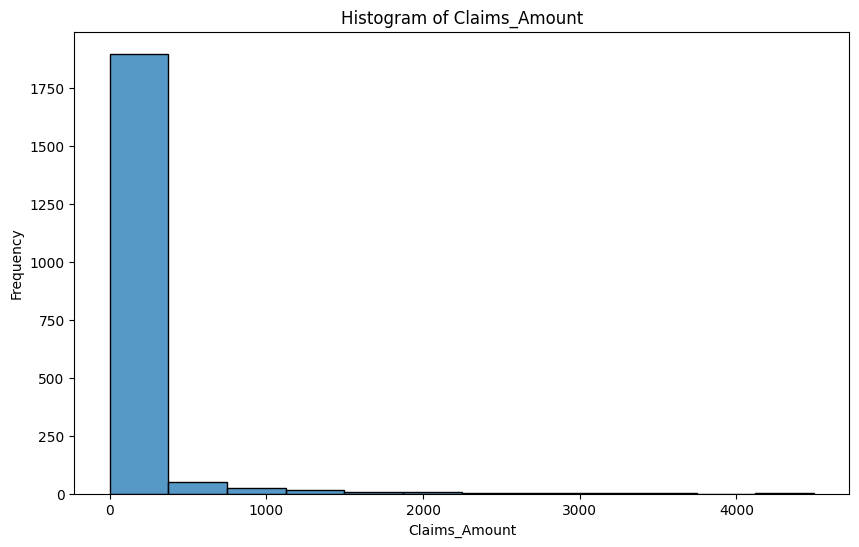

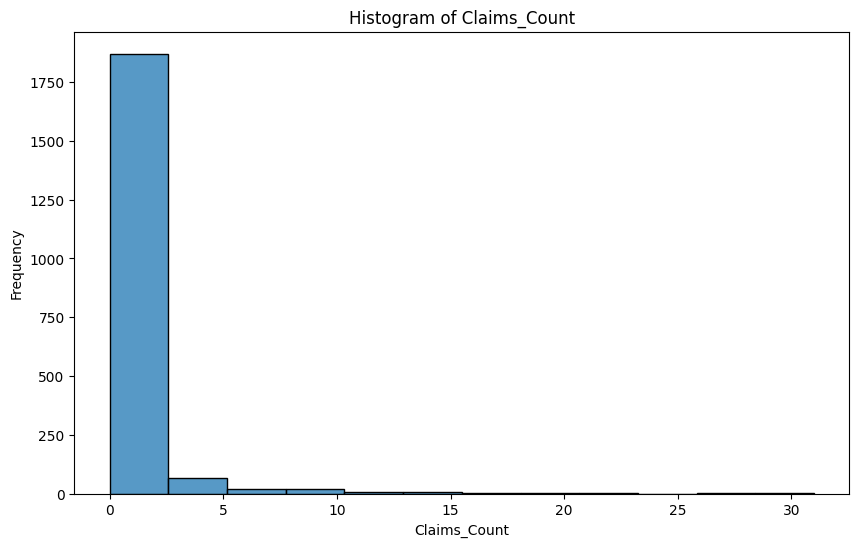

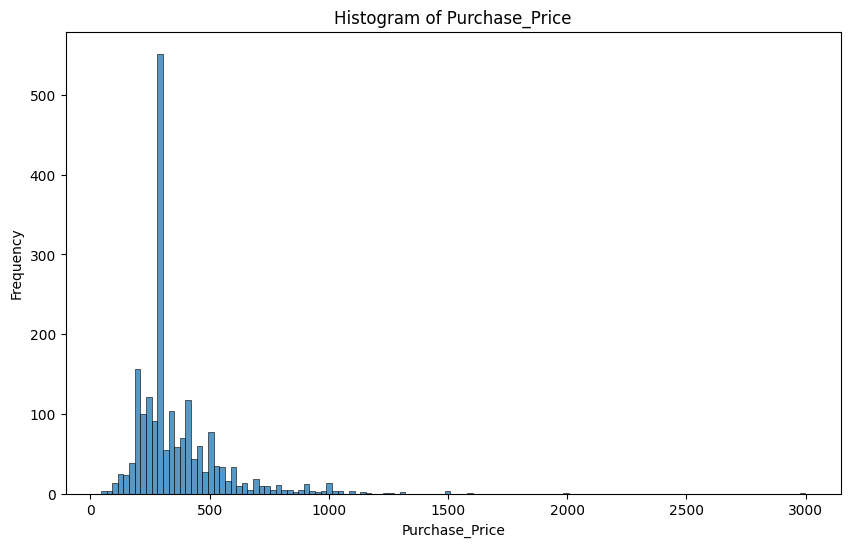

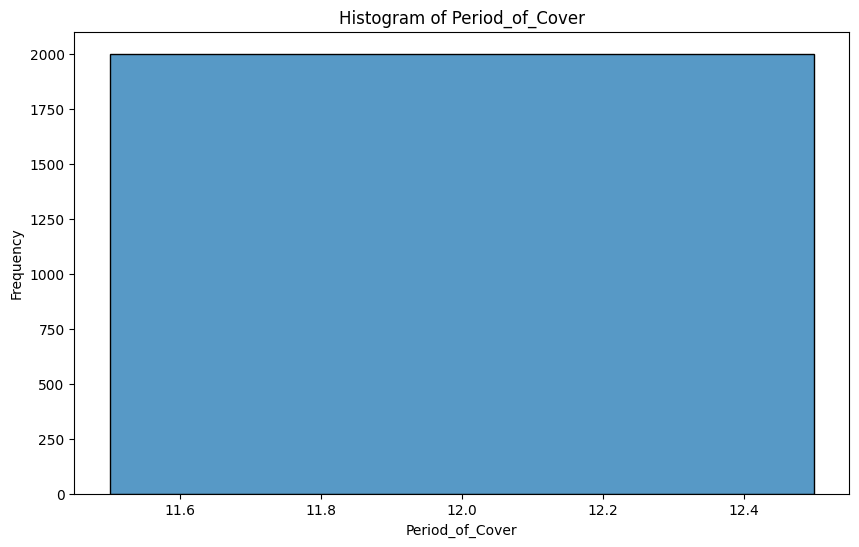

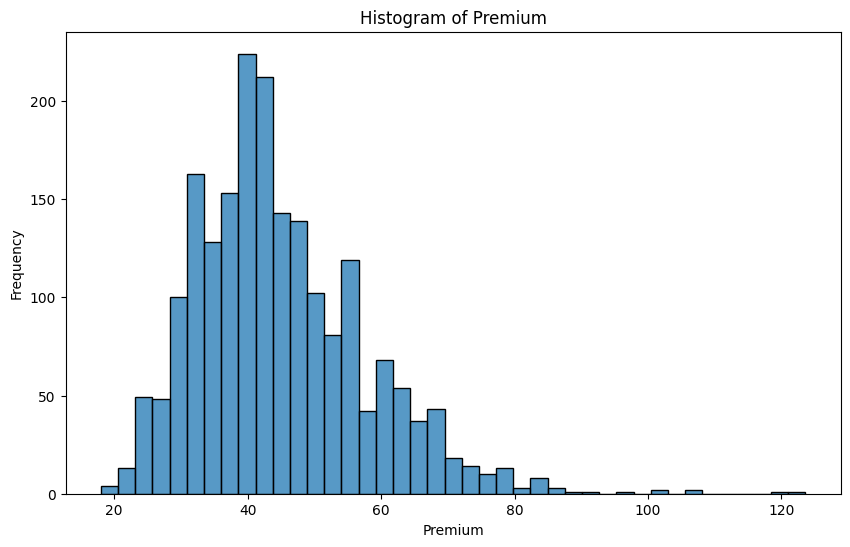

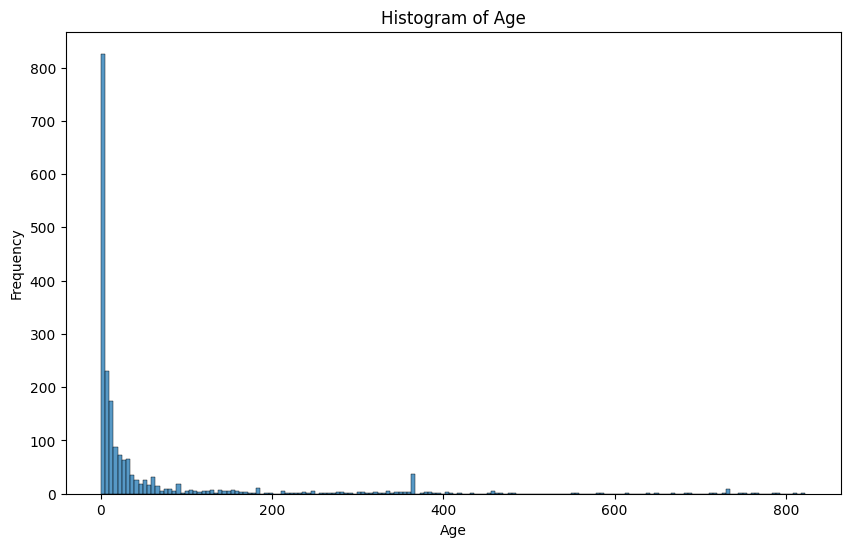

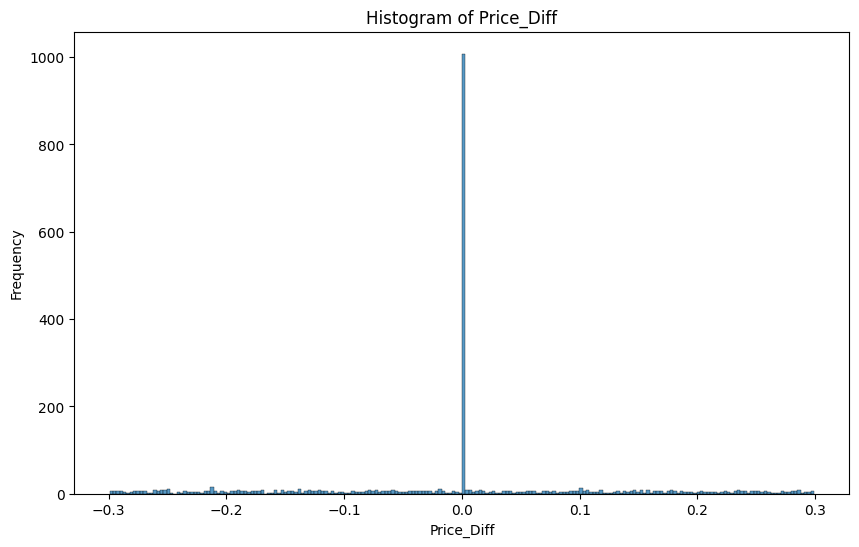

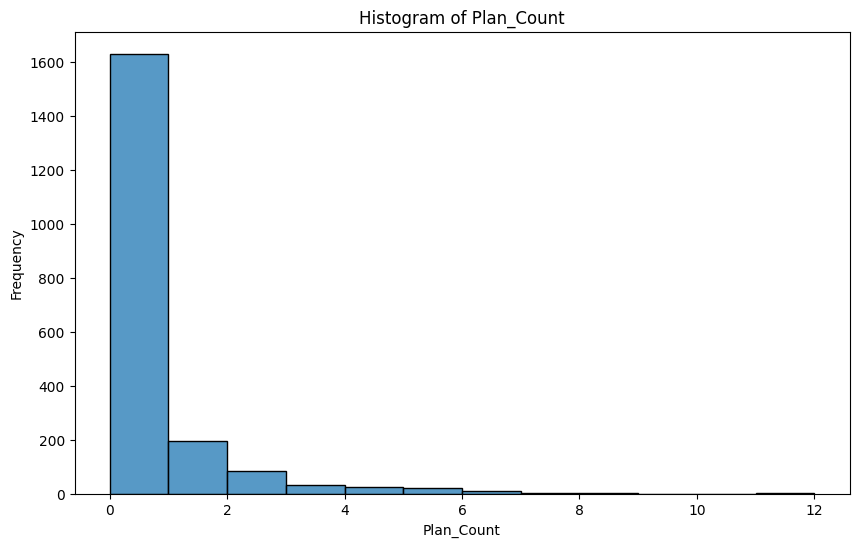

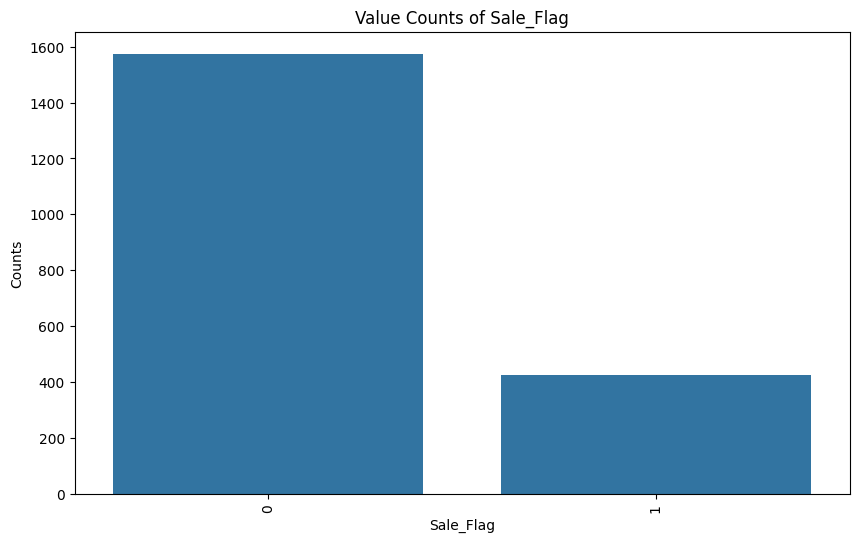

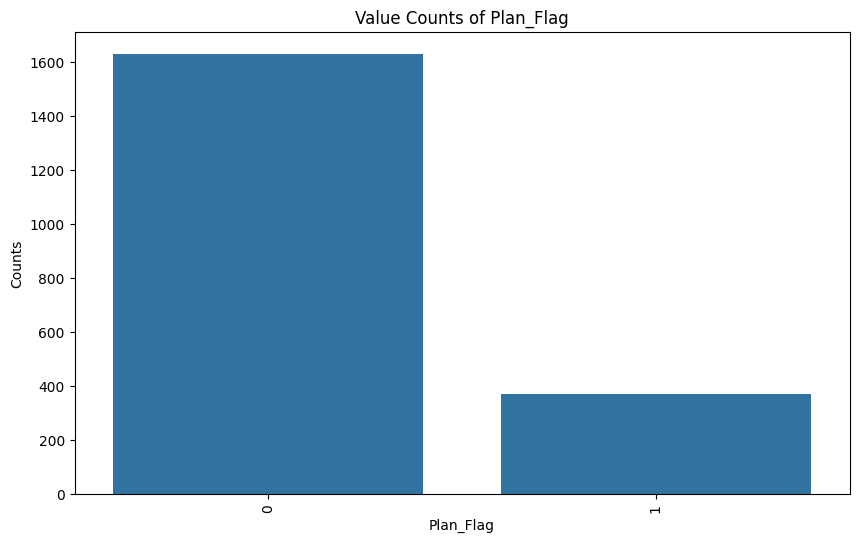

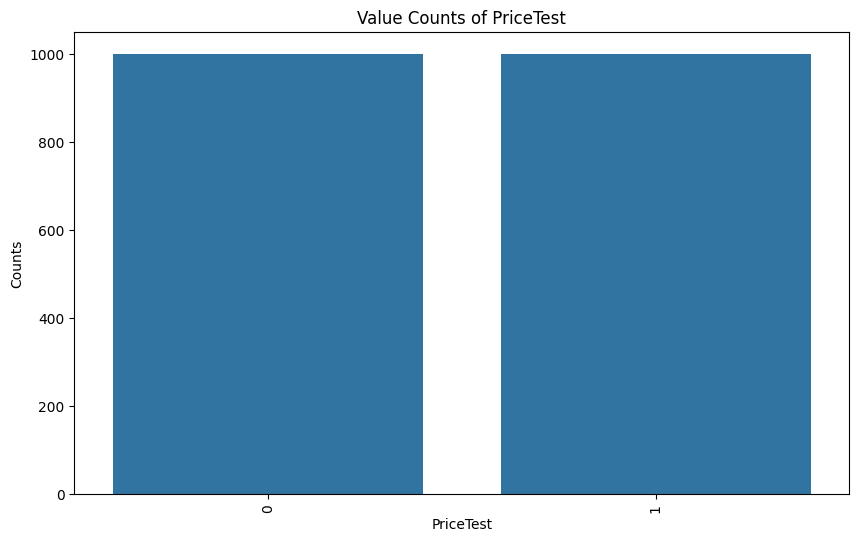

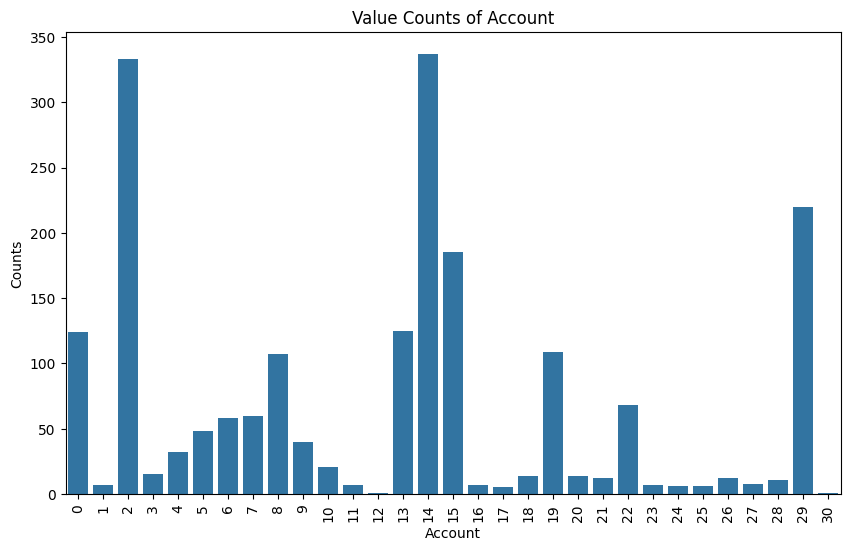

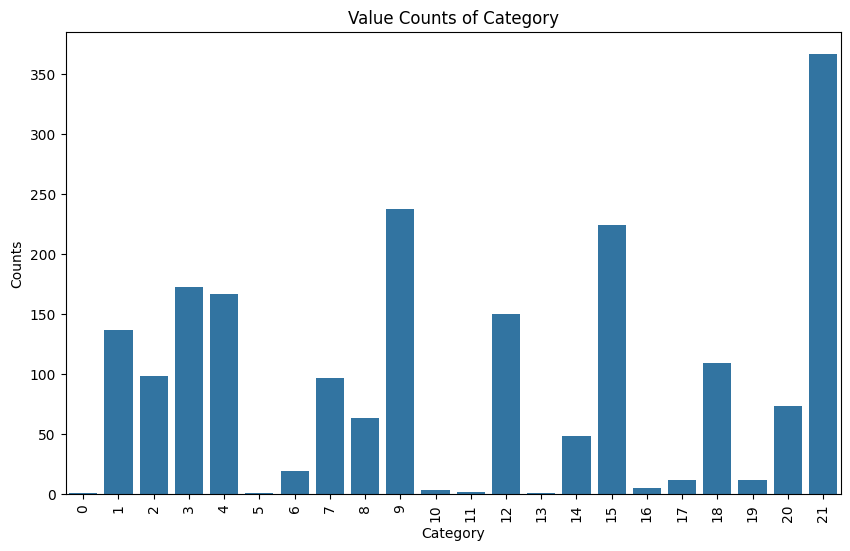

In [7]:

# Identifying numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['category']).columns

# Iterate over numerical columns and plot histograms
for col in numerical_columns:
    plot_histogram(df, col)

# Iterate over categorical columns and plot value counts
for col in categorical_columns:
    plot_value_counts(df, col)


Earliest Purchase Date: 2019-07-31 00:00:00
Latest Purchase Date: 2021-12-14 00:00:00
Earliest Cover Start Date: 2021-10-08 00:00:00
Latest Cover Start Date: 2021-12-14 00:00:00


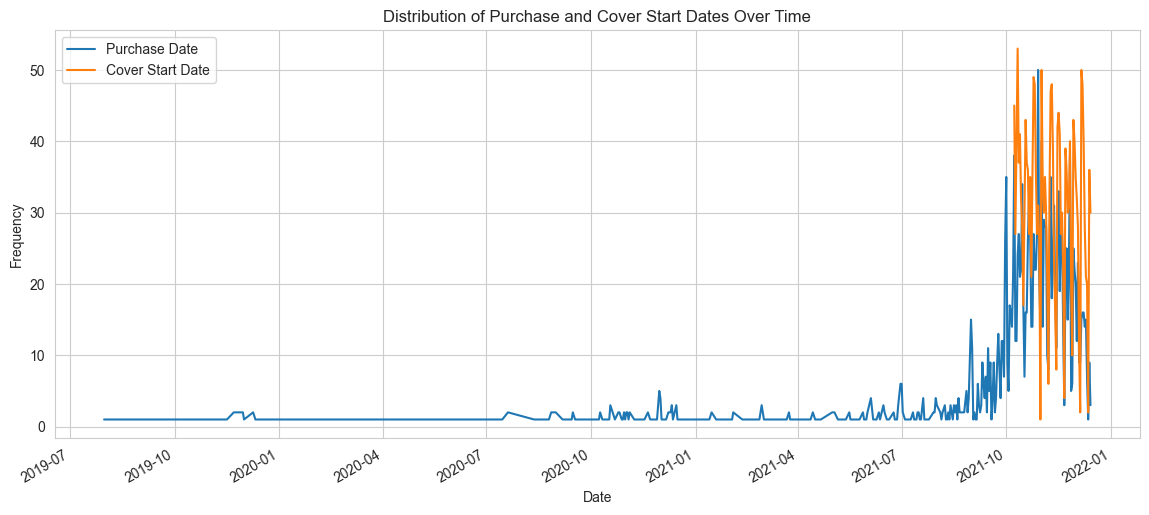

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Range of Dates
print(f"Earliest Purchase Date: {df['Purchase_Date'].min()}")
print(f"Latest Purchase Date: {df['Purchase_Date'].max()}")
print(f"Earliest Cover Start Date: {df['Cover_Start_Date'].min()}")
print(f"Latest Cover Start Date: {df['Cover_Start_Date'].max()}")

# 2. Frequency of Values - Plotting the distribution of dates
plt.figure(figsize=(14, 6))
df['Purchase_Date'].value_counts().sort_index().plot(label='Purchase Date')
df['Cover_Start_Date'].value_counts().sort_index().plot(label='Cover Start Date')
plt.title('Distribution of Purchase and Cover Start Dates Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. Identify any specific patterns or anomalies - This would require domain-specific insight but can start with visual exploration.


In [9]:
# discard the Period_of_Cover column
df = df.drop(columns=['Period_of_Cover'], axis=1)

In [10]:

# Ensure that all the relevant columns are of the correct numeric data type to perform calculations
df['Sale_Flag'] = df['Sale_Flag'].astype(float)
df['Premium'] = df['Premium'].astype(float)
df['PriceTest'] = df['PriceTest'].astype(float)

# Separate the dataset into two groups based on PriceTest strategy 1 for random price, 0 for no increase which we can interpret as flat price
price_test_group = df[df['PriceTest'] == 1]
flat_price_group = df[df['PriceTest'] == 0]

# Calculate the conversion rate (percentage of sales made) for both groups 1 for sale made, 0 for no sale on Sale_Flag column
conversion_rate_price_test = price_test_group['Sale_Flag'].mean()
conversion_rate_flat_price = flat_price_group['Sale_Flag'].mean()

# Calculate the average premium for both groups. Either mean or medina will work since the distribution looks normal and mean/median have roughtly the same value
avg_premium_price_test = price_test_group['Premium'].mean()
avg_premium_flat_price = flat_price_group['Premium'].mean()

# Calculate the elasticity components
delta_conversion = conversion_rate_price_test - conversion_rate_flat_price
delta_price = avg_premium_price_test - avg_premium_flat_price

# Calculate price elasticity for both groups
price_elasticity = (delta_conversion / conversion_rate_flat_price) / (delta_price / avg_premium_flat_price)

# Print the calculated values
print(f"Conversion rate for the price test group: {conversion_rate_price_test}")
print(f"Conversion rate for the flat price group: {conversion_rate_flat_price}")
print(f"Average premium for the price test group: €{avg_premium_price_test}")
print(f"Average premium for the flat price group: €{avg_premium_flat_price}")
print(f"Change in conversion rate (Δconversion): {delta_conversion}")
print(f"Change in average premium (Δprice): €{delta_price}")
print(f"Price elasticity of demand: {price_elasticity}")


Conversion rate for the price test group: 0.207
Conversion rate for the flat price group: 0.218
Average premium for the price test group: €44.46324
Average premium for the flat price group: €45.58032
Change in conversion rate (Δconversion): -0.01100000000000001
Change in average premium (Δprice): €-1.1170800000000014
Price elasticity of demand: 2.0588717045061444


The price elasticity of demand computed for the two pricing strategies—flat and random—reveals significant insights into customer behavior regarding the insurance premium for appliances. The elasticity measure of approximately 2.06 indicates that customers' purchase decisions are quite sensitive to price changes. Specifically, for every 1% decrease in the premium price, there is an expected increase of about 2.06% in the conversion rate, which represents the likelihood of customers purchasing the plan.

In practical terms, this outcome suggests that the random pricing strategy, where prices are varied, leads to a higher responsiveness in customer purchasing behavior than the flat pricing strategy, where prices are constant. The negative value of the change in conversion rate (Δconversion) at -0.011 implies that the conversion rate for the random price group is slightly lower than that for the flat price group (20.7% vs. 21.8%). Meanwhile, the average premium for the price test group is lower than that for the flat price group (€44.46 vs. €45.58), as reflected in the negative change in average premium (Δprice) of €-1.12.

The conclusion here is that while the random pricing strategy does lead to a lower average conversion rate compared to the flat price, the degree of elasticity suggests that small reductions in price could be leveraged to significantly boost sales. This information might be  critical for Domestic and General considering the potential impact of dynamic pricing strategies on sales performance and can be used to fine-tune pricing for maximum profitability and market penetration.

In [81]:
# save in the same directory the cleaned data set
# df.to_csv('cleaned_data.csv', index=False)